In [1]:
import segyio
import h5py
import scipy.io
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import detrend, butter, filtfilt
import cigsegy

In [2]:
def read_segy(file_path):
    with segyio.open(file_path, "r", ignore_geometry=True)as f: 
        data1 = np.asarray([np.copy(x) for x in f.trace[:]]).T  
        return data1
        
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data, axis=0)

## Check the trace header of SEGY file

In [3]:
import cigsegy

cigsegy.textual_header('./data/GrSk4_VP09_raw.sgy')

C01 Client GFZ,  recorded by: Schlumberger wireline                             
C02 Project: RissDom VSP, area Schorfheide/Germany, well GtGrSk 4/05            
C03 Date: 16-Feb-2017                                                           
C04 Instrument: SLB hDVS serial no Tier3 hDVS                                   
C05 Data traces/record 773     auxiliary traces/record 0                        
C06 Sample interval 2000 us, Samples/trace  21000                               
C07 Recording format        format this reel segy   measurement system 1        
C08 Sample code: floating pt 5   correlated no                                  
C09 hDVS response is proportional to strain moving-average over the GL = 20 m   
C10                                                                             
C11 Source: 4 Vibrator Trucks Mertz M12 Hemi 48, peak force 200kN (45100 lbf)   
C12 each operated by DMT, with VibPro electronics                               
C13 Sweep type 2: start 10 H

In [4]:
cigsegy.metaInfo('./data/GrSk4_VP09_raw.sgy')

shape: (n-inline, n-crossline, n-time) = (17, 1, 20001)
N traces: 13141
interval: di(iline) = nan m, dx(xline) = nan m, dt = 2 ms
range: inline: 260 - 276, crossline: 0 - 0, t: 0 - 40000.0 ms
trace sorting code: Unknown
scalar: -100, data format: 4-byte IEEE floating-point
(key info) iline:   9, xline: 193, xloc: 181, yloc: 185
           istep:   1, xstep:   1



In [5]:
## load data
data = read_segy('./data/GrSk4_VP09_raw.sgy')

## demean
de_data = data  - np.mean(data, axis=0)

## detrend
detrended_data = detrend(de_data, axis=0)

## filtering
filter_data = bandpass_filter(data, lowcut=0.1, highcut=200.0, fs=1000.0)

## Cut the profile and save samples

In [6]:
import os
raw_path = "./raw_data/GrSk4_VP09_raw/"
os.makedirs(raw_path, exist_ok=True)

width = 773
for i in range(0, 15):
    slice_data = detrended_data[:2000, width*i:width*(i+1)]
    slice_data1 = slice_data[:, 73:]
    np.save(f'{raw_path}data_{i+1}.npy', slice_data1)

## Visualization 

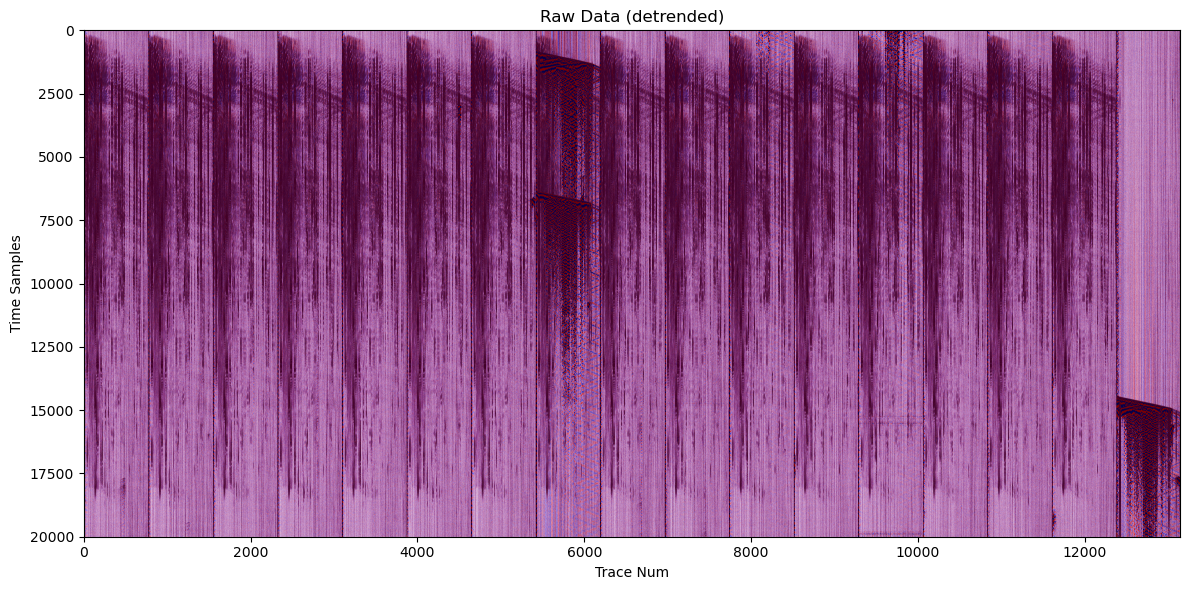

In [7]:
v = 0.05

## Raw data
plt.figure(figsize=(12, 6))
f3 = plt.imshow(detrended_data, aspect="auto", vmin=-v, vmax=v, cmap="seismic")
plt.title('Raw Data (detrended)')
plt.xlabel("Trace Num")
plt.ylabel("Time Samples")
plt.tight_layout()

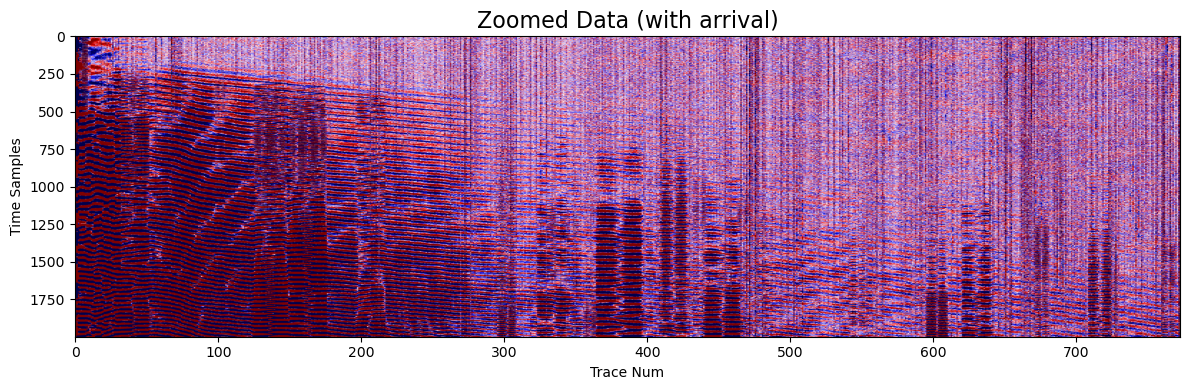

In [8]:
## Zoomed data
plt.figure(figsize=(12, 4))
f3 = plt.imshow(slice_data, aspect="auto", vmin=-v, vmax=v, cmap="seismic")
plt.title('Zoomed Data (with arrival)', fontsize=16)
plt.xlabel("Trace Num")
plt.ylabel("Time Samples")
plt.tight_layout()

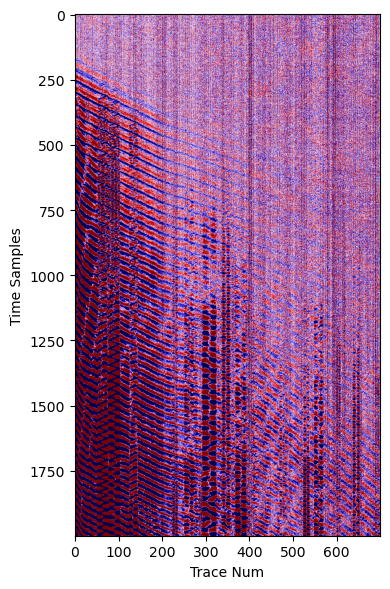

In [9]:
## An example of the sample 
width = 773
plt.figure(figsize=(4, 6))
f3 = plt.imshow(slice_data1, aspect="auto", vmin=-v, vmax=v, cmap="seismic")
plt.xlabel("Trace Num")
plt.ylabel("Time Samples")
plt.tight_layout()